In [2]:
import numpy as np
   
from skimage.color import rgb2lab, rgb2gray, lab2rgb
from skimage.io import imread, imshow
import matplotlib.pyplot as plt

import cv2
    

In [5]:

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

In [9]:
def print_image_summary(image, labels):
    
    print('--------------')
    print('Image Details:')
    print('--------------')
    print(f'Image dimensions: {image.shape}')
    print('Channels:')
    
    if len(labels) == 1:
        image = image[..., np.newaxis]
        
    for i, lab in enumerate(labels):
        min_val = np.min(image[:,:,i])
        max_val = np.max(image[:,:,i])
        avg_val = np.mean(image[:,:,i])
        print(f'{lab} : min={min_val:.4f}, max={max_val:.4f}, avg = {avg_val:.4f}')

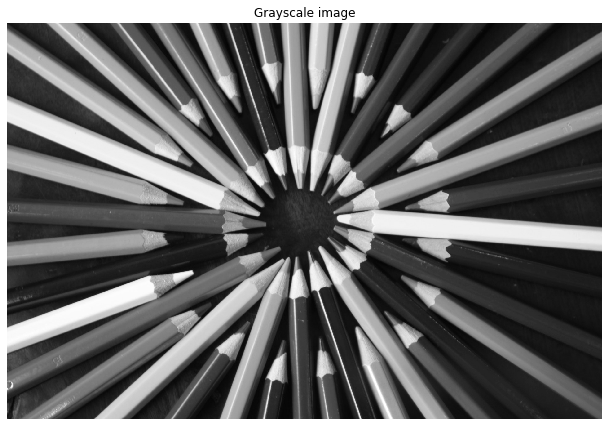

In [4]:
image_gs = imread('crayons.jpg', as_gray=True)
fig, ax = plt.subplots(figsize=(9, 16))
imshow(image_gs, ax=ax)
ax.set_title('Grayscale image')
ax.axis('off');

In [10]:
print_image_summary(image_gs, ['G'])


--------------
Image Details:
--------------
Image dimensions: (1280, 1920)
Channels:
G : min=0.0137, max=1.0000, avg = 0.3562


## RGB

In [12]:
image_rgb = imread("crayons.jpg")

In [15]:
print_image_summary(image_rgb, ['R','G','B'])

--------------
Image Details:
--------------
Image dimensions: (1280, 1920, 3)
Channels:
R : min=0.0000, max=255.0000, avg = 105.9130
G : min=0.0000, max=255.0000, avg = 88.0849
B : min=0.0000, max=255.0000, avg = 73.5486


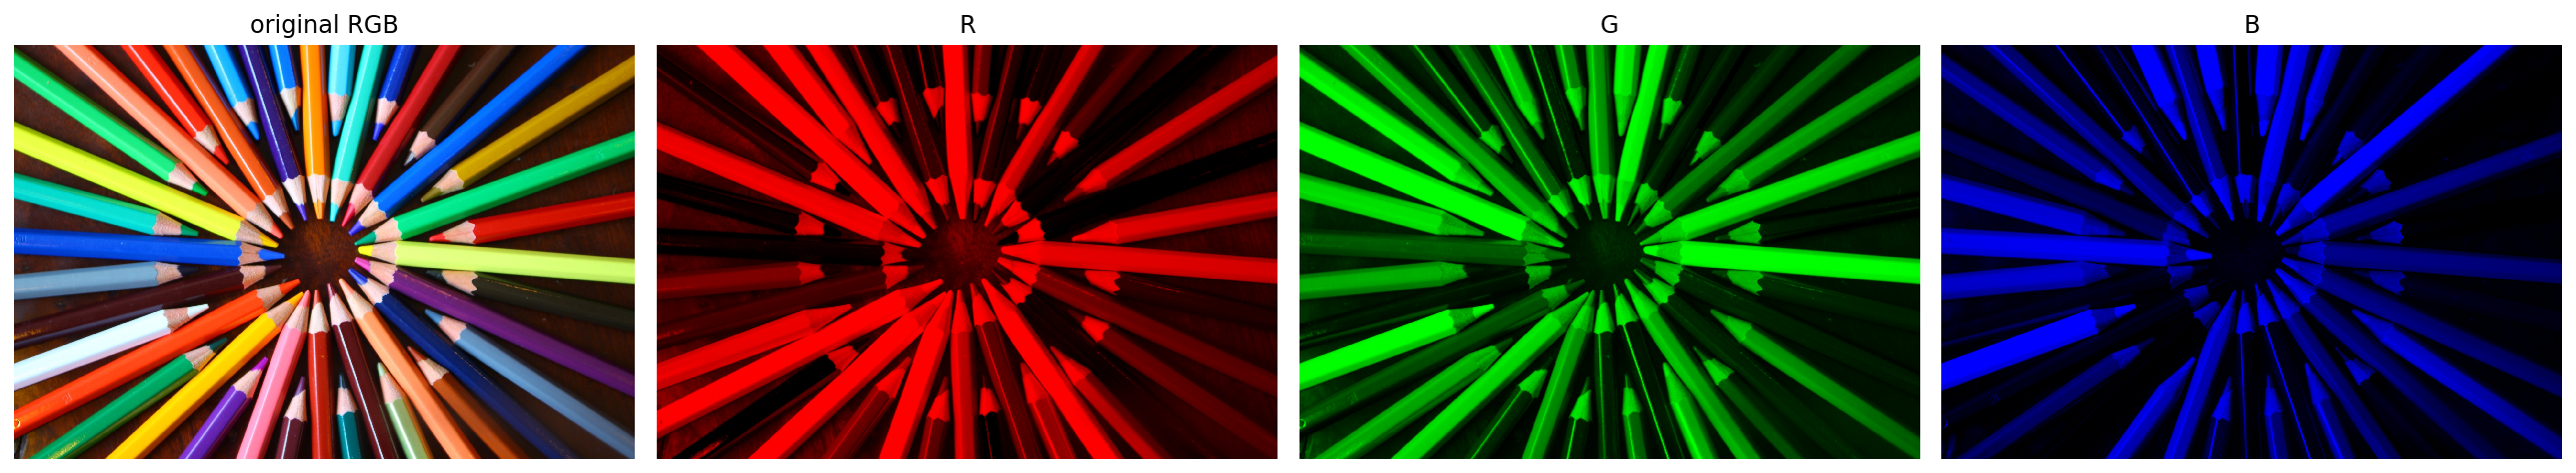

In [16]:
fig, ax = plt.subplots(1, 4, figsize = (18, 30))

ax[0].imshow(image_rgb/255.0) 
ax[0].axis('off')
ax[0].set_title('original RGB')

for i, lab in enumerate(['R','G','B'], 1):
    temp = np.zeros(image_rgb.shape)
    temp[:,:,i - 1] = image_rgb[:,:,i - 1]
    ax[i].imshow(temp/255.0) 
    ax[i].axis("off")
    ax[i].set_title(lab)

plt.tight_layout()
plt.savefig('rgb_1.png', dpi=300)
plt.show()

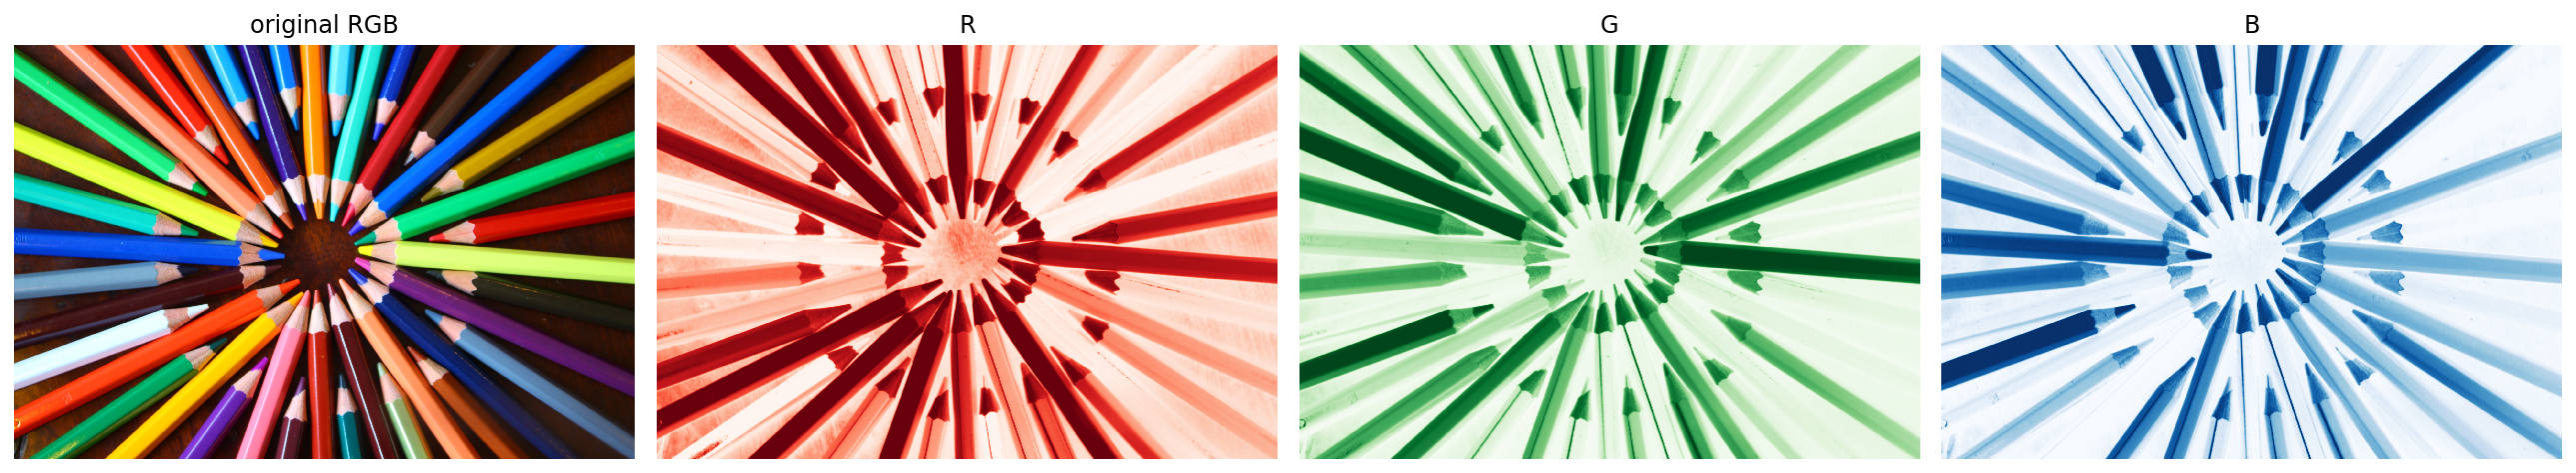

In [17]:
fig, ax = plt.subplots(1, 4, figsize = (18, 30))

ax[0].imshow(image_rgb) 
ax[0].axis('off')
ax[0].set_title('original RGB')

for i, cmap in enumerate(['Reds','Greens','Blues']):
    ax[i+1].imshow(image_rgb[:,:,i], cmap=cmap) 
    ax[i+1].axis('off')
    ax[i+1].set_title(cmap[0])
    
plt.tight_layout()
plt.savefig('rgb_2.png', dpi=300)

plt.show()

## LAB

In [18]:
image_lab = rgb2lab(image_rgb / 255)
print_image_summary(image_lab, ['L', 'a', 'b'])

--------------
Image Details:
--------------
Image dimensions: (1280, 1920, 3)
Channels:
L : min=0.9589, max=100.0000, avg = 40.4598
a : min=-73.1449, max=82.0407, avg = 12.1855
b : min=-94.1098, max=91.0263, avg = 13.0760


### To be printed correctly, the Lab values must be rescaled to the [0,1] range

#scale the lab image
image_lab_scaled = (image_lab + [0, 128, 128]) / [100, 255, 255]

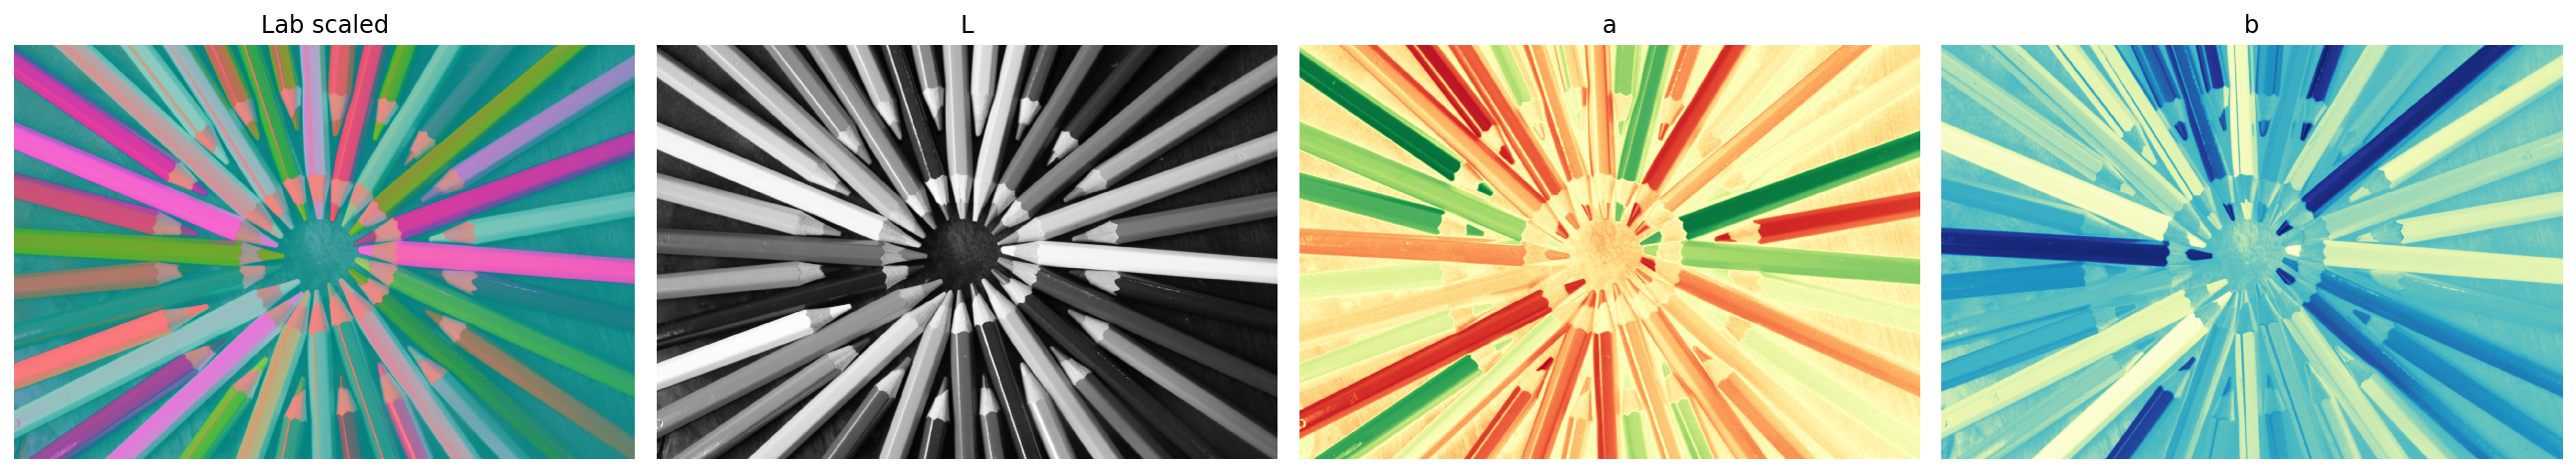

In [20]:
fig, ax = plt.subplots(1, 4, figsize = (18, 30))

ax[0].imshow(image_lab_scaled) 
ax[0].axis('off')
ax[0].set_title('Lab scaled')

imshow(image_lab_scaled[:,:,0], ax=ax[1]) 
ax[1].axis('off')
ax[1].set_title('L')

ax[2].imshow(image_lab_scaled[:,:,1], cmap='RdYlGn_r') 
ax[2].axis('off')
ax[2].set_title('a')

ax[3].imshow(image_lab_scaled[:,:,2], cmap='YlGnBu_r') 
ax[3].axis('off')
ax[3].set_title('b')
    
plt.tight_layout()
plt.savefig('lab_3.png', dpi=300)

plt.show()

### L is greyscale, a: green-red color spectrum, b: blue-yellow color spectrum